# Checking limits in ellc

*Following ellc's ldy.py*

In [1]:
import numpy as np
from astropy.io import fits
from os.path import join,abspath,dirname
from scipy.interpolate import RegularGridInterpolator

dir_path = "/Users/ageller/anaconda/envs/py36/lib/python3.6/site-packages/ellc"
ld_file_1 = join(dir_path,'data','g_Claret2011.fits')
ld_file_2 = join(dir_path,'data','g_Claret2004.fits')

In [6]:
hdulist = fits.open(ld_file_2)
teff = hdulist['Teff'].data
logg = hdulist['logg'].data
M_H = hdulist['M_H'].data
bands = hdulist['band'].data
pts = (M_H,logg,teff)

btest = []
ttest = []
gtest = []
ztest = []
ptest = []
for band in ['u_','g_','r_','i_','z_']:
    i_band = (bands['BAND'].rfind(band) > -1).nonzero()[0][0]
    grid = (hdulist[0].data)[i_band,:,:,:,:]
    _a1 = RegularGridInterpolator(pts,grid[0,:,:,:],fill_value=None)
    _a2 = RegularGridInterpolator(pts,grid[1,:,:,:],fill_value=None)
    _a3 = RegularGridInterpolator(pts,grid[2,:,:,:],fill_value=None)
    _a4 = RegularGridInterpolator(pts,grid[3,:,:,:],fill_value=None)
    for t in teff:
        for g in logg:
            for z in M_H:
                a1 = _a1([z,g,t])
                a2 = _a2([z,g,t])
                a3 = _a3([z,g,t])
                a4 = _a4([z,g,t])
                passed = False
                if (np.isfinite(a1) and np.isfinite(a2) and np.isfinite(a3) and np.isfinite(a4)):
                    passed = True
                btest.append(band)
                ttest.append(t)
                gtest.append(g)
                ztest.append(z)
                ptest.append(passed)
                
hdulist.close()

In [9]:
btest = np.array(btest)
ttest = np.array(ttest)
gtest = np.array(gtest)
ztest = np.array(ztest)
ptest = np.array(ptest)

In [19]:
for band in ['u_','g_','r_','i_','z_']:
    use = np.where(np.logical_and(btest == band, ptest == True))
    print(f"{band} Teff {min(ttest[use])} to {max(ttest[use])} ")
    print(f"{band} logg {min(gtest[use])} to {max(gtest[use])} ")
    print(f"{band} M/H  {min(ztest[use])} to {max(ztest[use])} ")
    

u_ Teff 3500.0 to 40000.0 
u_ logg 0.0 to 5.0 
u_ M/H  -5.0 to 1.0 
g_ Teff 3500.0 to 40000.0 
g_ logg 0.0 to 5.0 
g_ M/H  -5.0 to 1.0 
r_ Teff 3500.0 to 40000.0 
r_ logg 0.0 to 5.0 
r_ M/H  -5.0 to 1.0 
i_ Teff 3500.0 to 40000.0 
i_ logg 0.0 to 5.0 
i_ M/H  -5.0 to 1.0 
z_ Teff 3500.0 to 40000.0 
z_ logg 0.0 to 5.0 
z_ M/H  -5.0 to 1.0 


In [21]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


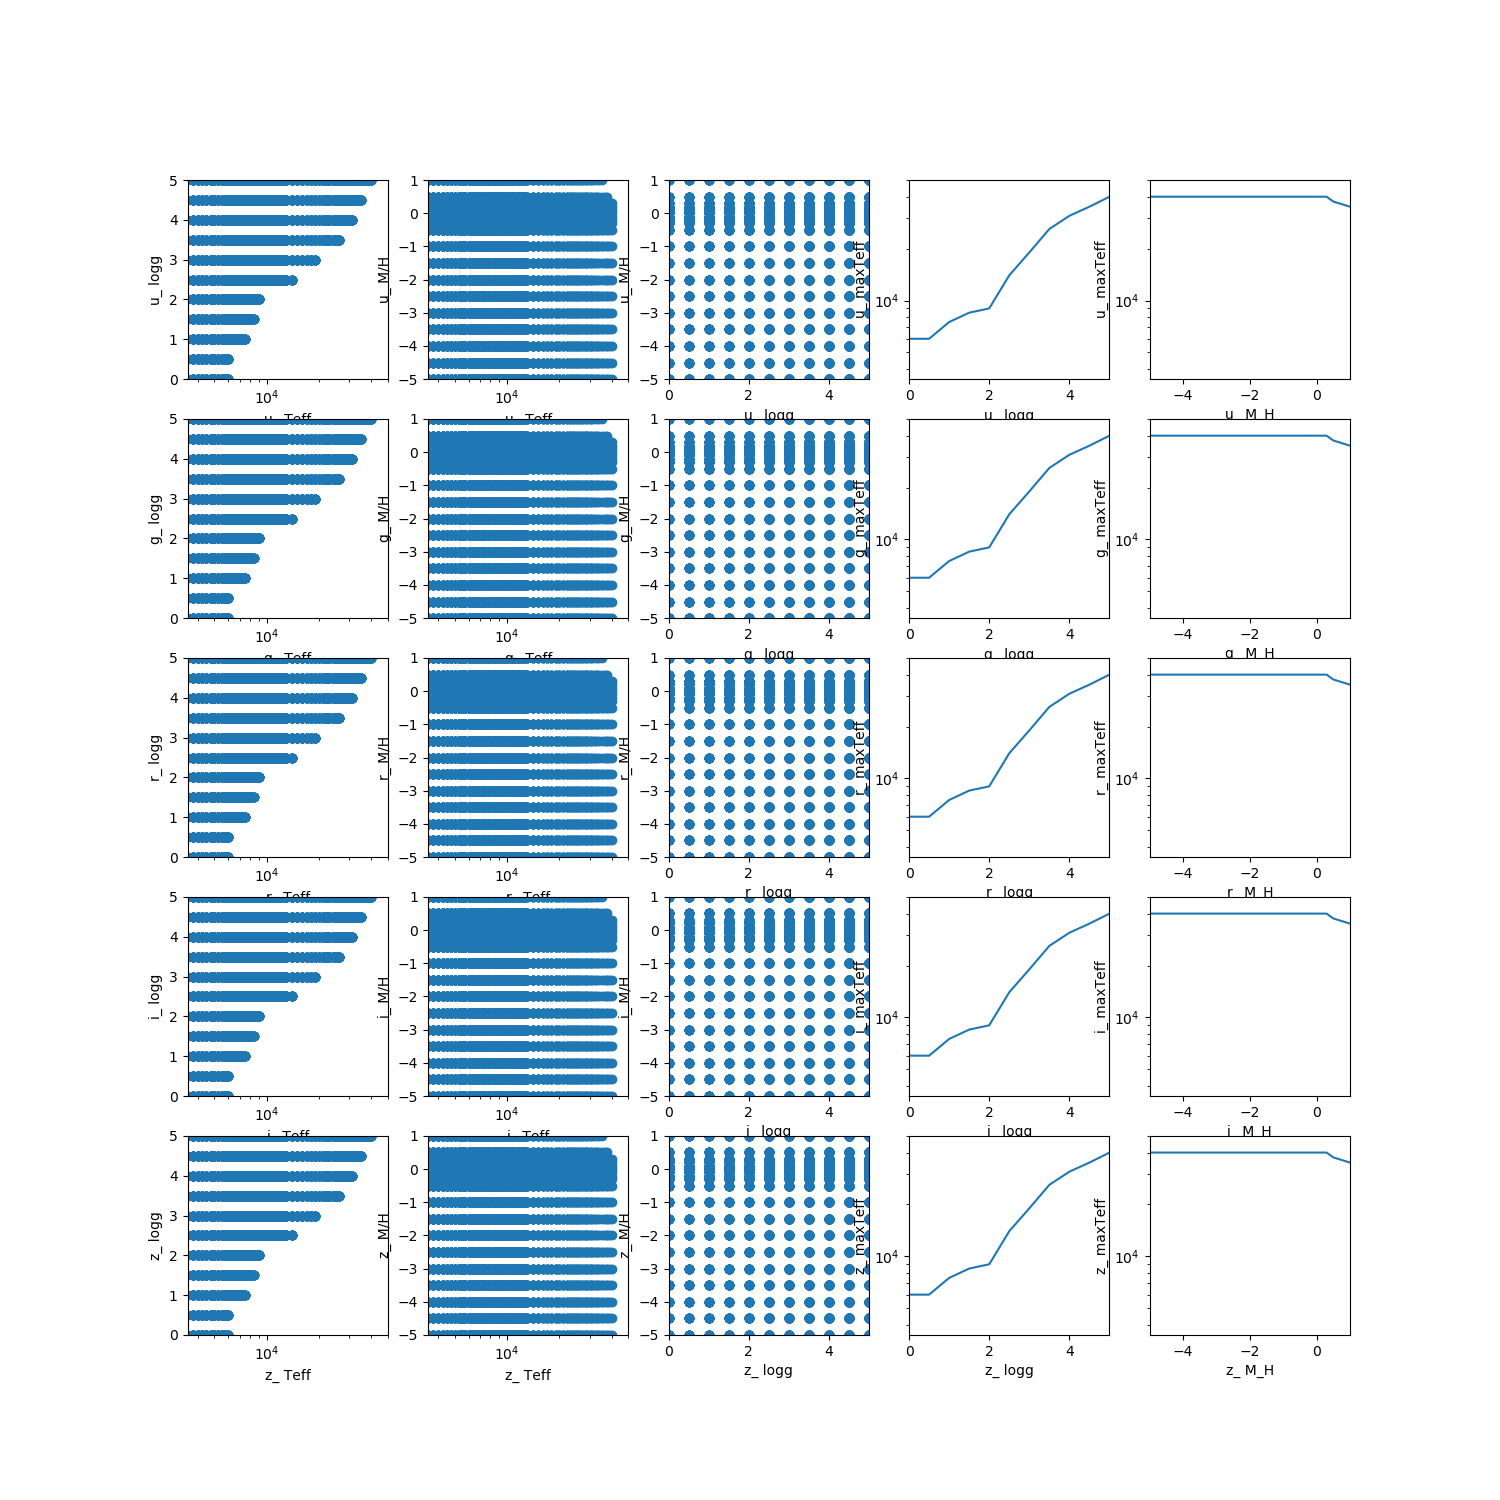

In [25]:
f, ax = plt.subplots(5, 5, figsize=(15, 15))
for i,band in enumerate(['u_','g_','r_','i_','z_']):
    use = np.where(np.logical_and(btest == band, ptest == True))
    
    ax[i,0].scatter(ttest[use],gtest[use])
    ax[i,0].set_xlabel(f'{band} Teff')    
    ax[i,0].set_ylabel(f'{band} logg')
    ax[i,0].set_xlim(3500, 50000) 
    ax[i,0].set_ylim(0, 5)
    ax[i,0].set_xscale('log')
    
    ax[i,1].scatter(ttest[use],ztest[use])
    ax[i,1].set_xlabel(f'{band} Teff')    
    ax[i,1].set_ylabel(f'{band} M/H')
    ax[i,1].set_xlim(3500, 50000)    
    ax[i,1].set_ylim(-5, 1) 
    ax[i,1].set_xscale('log')
   
    ax[i,2].scatter(gtest[use],ztest[use])
    ax[i,2].set_xlabel(f'{band} logg')    
    ax[i,2].set_ylabel(f'{band} M/H')
    ax[i,2].set_xlim(0, 5)    
    ax[i,2].set_ylim(-5, 1)  
    
    #plot max Teff vs. logg
    gg = gtest[use]
    tt = ttest[use]
    mtg = []
    for g in logg:
        use1 = np.where(gg == g)
        mtg.append(max(tt[use1]))
    ax[i,3].plot(logg,mtg)
    ax[i,3].set_xlabel(f'{band} logg')    
    ax[i,3].set_ylabel(f'{band} maxTeff')
    ax[i,3].set_xlim(0, 5)
    ax[i,3].set_ylim(3500, 50000) 
    ax[i,3].set_yscale('log')
    
    #plot max Teff vs. M_H
    zz = ztest[use]
    tt = ttest[use]
    mtg = []
    for z in M_H:
        use1 = np.where(zz == z)
        mtg.append(max(tt[use1]))
    ax[i,4].plot(M_H,mtg)
    ax[i,4].set_xlabel(f'{band} M_H')    
    ax[i,4].set_ylabel(f'{band} maxTeff')
    ax[i,4].set_xlim(-5, 1)
    ax[i,4].set_ylim(3500, 50000) 
    ax[i,4].set_yscale('log')
    

### Data from Claret & Bloemen (2011A&A...529A..75C)

*http://cdsarc.u-strasbg.fr/viz-bin/Cat?cat=J%2FA%2BA%2F529%2FA75&target=readme&*

In [32]:
import pandas as pd

In [33]:
names = ['logg','Teff','M_H','xi','a1','a2','a3','a4','filt','method','model']
dat = pd.read_csv('tableeq5.dat', delim_whitespace=True, header=None, names=names)

In [34]:
xx = dat[(dat['logg'] == 4.5) & (dat['Teff'] == 5500) & (dat['xi'] == 2)]
print(xx['filt'].values)

['Kp' 'Kp' 'Kp' 'Kp' 'Kp' 'Kp' 'Kp' 'Kp' 'Kp' 'Kp' 'Kp' 'Kp' 'Kp' 'Kp'
 'Kp' 'Kp' 'Kp' 'Kp' 'Kp' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1'
 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S2' 'S2' 'S2' 'S2'
 'S2' 'S2' 'S2' 'S2' 'S2' 'S2' 'S2' 'S2' 'S2' 'S2' 'S2' 'S2' 'S2' 'S2'
 'S2' 'S3' 'S3' 'S3' 'S3' 'S3' 'S3' 'S3' 'S3' 'S3' 'S3' 'S3' 'S3' 'S3'
 'S3' 'S3' 'S3' 'S3' 'S3' 'S3' 'S4' 'S4' 'S4' 'S4' 'S4' 'S4' 'S4' 'S4'
 'S4' 'S4' 'S4' 'S4' 'S4' 'S4' 'S4' 'S4' 'S4' 'S4' 'S4' 'u' 'u' 'u' 'u'
 'u' 'u' 'u' 'u' 'u' 'u' 'u' 'u' 'u' 'u' 'u' 'u' 'u' 'u' 'u' 'b' 'b' 'b'
 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'v' 'v'
 'v' 'v' 'v' 'v' 'v' 'v' 'v' 'v' 'v' 'v' 'v' 'v' 'v' 'v' 'v' 'v' 'v' 'y'
 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y'
 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U'
 'U' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'